# Concurrency

Here is a quick graphical demostration why concurrency is not good.

In [26]:
# This is a sample label that was used in mean-reversion strategy

display_df = pd.read_csv('./concurrency.csv', 
                 header=0, 
                 parse_dates = True, 
                 index_col=['date_time'])

p = print

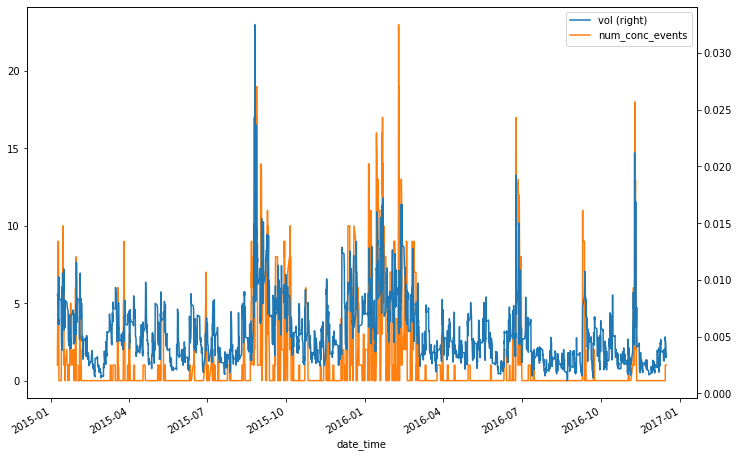

In [27]:
# concurrent labels tends to appear during high volatility, but may not be true vice versa
# Code snippet from mlfinlab

display_df[['vol', 'num_conc_events']].plot(secondary_y='vol', figsize=(12,8))

## Regression test

If you try to build a regression model based on all the data we have gathered, in this case using ordinary least square method to fit.

The Y axis reflects percentage change (Non-annualized), while X axis reflects number of concurrent events. Using 3 years worth of sample.

You will realised that up till a certain point, the relationship tends to fade away around 12 - 13 concurrent event against daily returns. (Point of max)

Quick comparison: [mlfinlab chapter 4 scatter graph example](https://github.com/hudson-and-thames/research/blob/master/Chapter4/Chapter4_Exercises.ipynb)

#### Possible explanantion and implication

mlfinlab example uses shorter sample < 3 years with point of max would be around 10 instead.

A larger sample, it will push the number of concurrent event higher but it will still display a polynomial relationship.

If you think about it, it may make sense since larger sample naturally breeds more events (hence concurrency), up till a certain point before fading (In physical world, all processes are finite).

These concurrent events do have life-span as well, therefore may carry over to next period. In short, not only it will have distortion vertically (Events), but horizontally (Time) as well.

**Please note that some mlfinlab code found within their example may not be working, there has been several updates since inception**

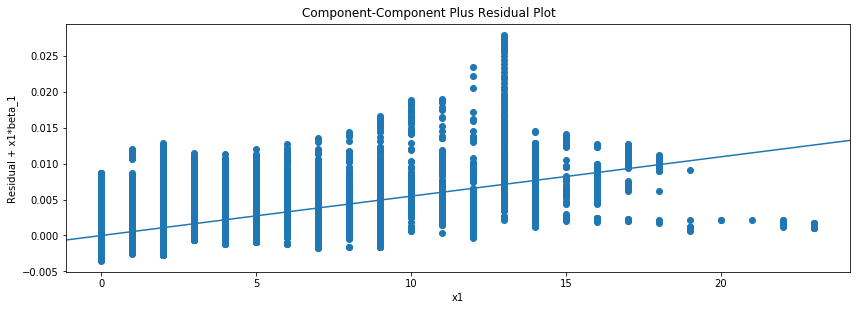

In [29]:
# Up till a certain point then regression tends to be not valid
# Which may explain the above observations
# The below shows more of a polyfit regression where relationship actually have a sharp drop beyong a certain point

X = smi.tools.tools.add_constant(display_df['num_conc_events']
                                 .to_numpy())

results = smi.regression.linear_model.OLS(display_df['vol']
                                          .to_numpy(), X).fit()

fig = sm.graphics.regressionplots.plot_ccpr_grid(results, 
                                                 fig=plt.figure(figsize=(12, 8)))